#                Name : Touseef Asif
#                Code Alpha Internship
#       Task 01: Titanic Classification.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [10, 5]

In [33]:
# Load the datasetv
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Display basic information about the dataset
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


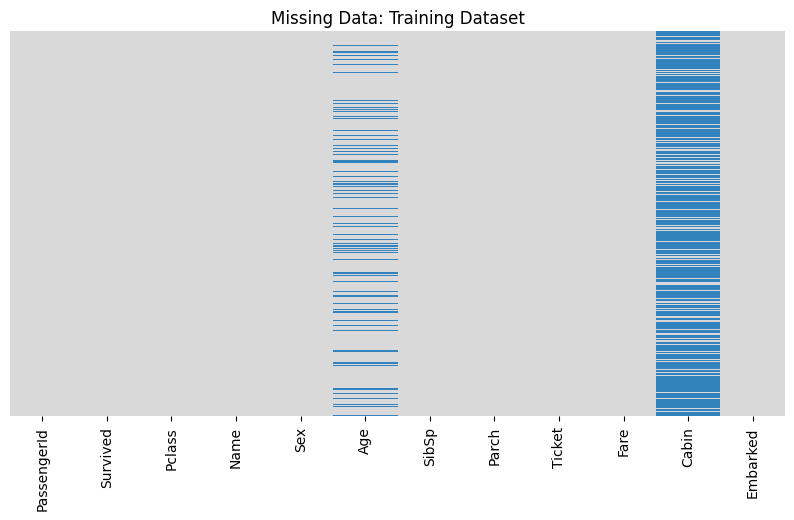

In [34]:

# Visualize missing data using a heatmap
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title("Missing Data: Training Dataset")
plt.show()

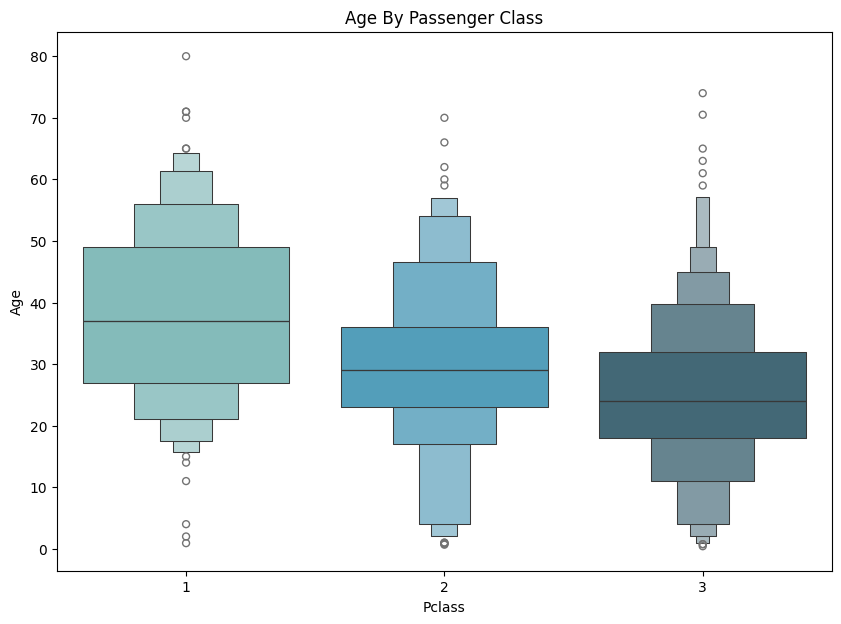

In [35]:

# Visualize age distribution by passenger class
plt.figure(figsize=(10, 7))
sns.boxenplot(x="Pclass", y="Age", data=df, palette="GnBu_d").set_title("Age By Passenger Class")
plt.show()

In [36]:
# Imputation function for missing ages
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# Apply the imputation function to the Age column
df["Age"] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
df.drop("Cabin", axis=1, inplace=True)
df.dropna(inplace=True)


In [37]:

# Remove unnecessary columns
df.drop(columns=["Name", "Ticket"], axis=1, inplace=True)

# Convert categorical columns to category type
objcat = ['Sex', 'Embarked']
for column in objcat:
    df[column] = df[column].astype('category')


In [38]:
# Drop PassengerId column
df.drop("PassengerId", axis=1, inplace=True)

In [39]:
# Convert categorical variables into dummy/indicator variables
sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
embarked = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)


In [40]:
# Add new dummy columns into the DataFrame
df = pd.concat([df, sex, embarked], axis=1)
df.drop(["Sex", "Embarked"], axis=1, inplace=True)



In [41]:
# Split the data into features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]



In [42]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



In [43]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



In [44]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Classification Model")
print("---" * 30)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy: {acc}%")


Classification Model
------------------------------------------------------------------------------------------
Accuracy: 82.02%


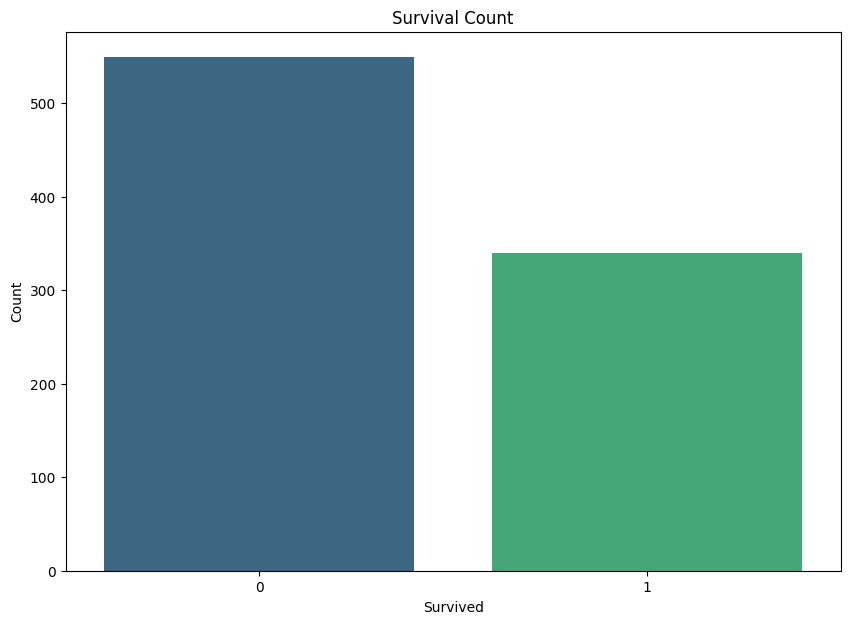

In [45]:

# Visualizations

# Count plot of Survived vs. Not Survived
plt.figure(figsize=(10, 7))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


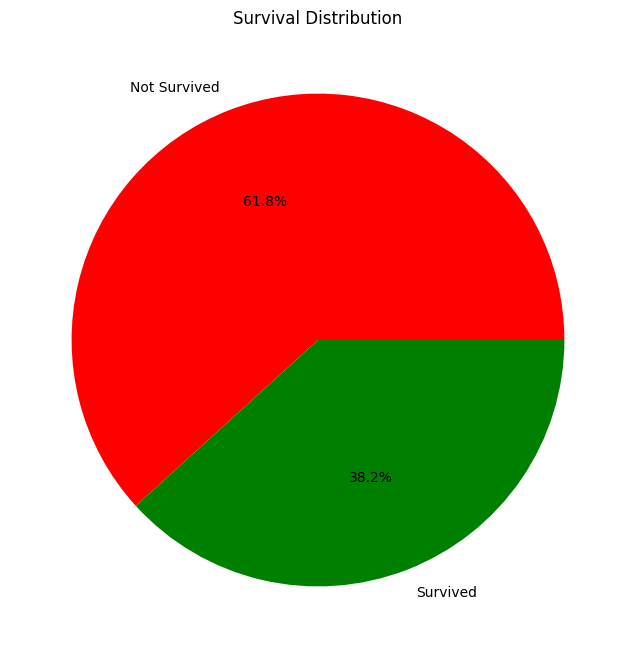

In [46]:

# Pie chart of Survived vs. Not Survived
plt.figure(figsize=(8, 8))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], labels=['Not Survived', 'Survived'])
plt.title("Survival Distribution")
plt.ylabel('')
plt.show()



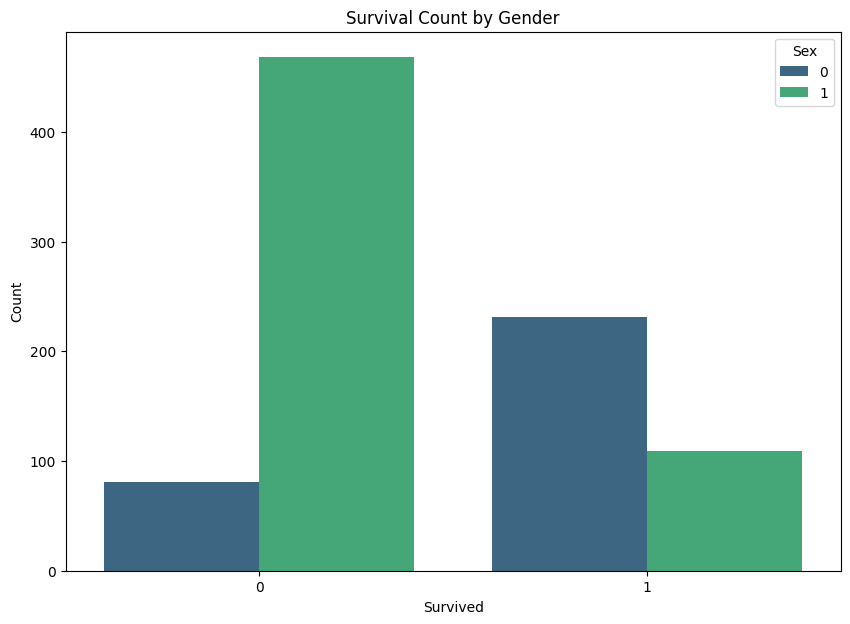

In [47]:
# Count plot of Survived by Gender
plt.figure(figsize=(10, 7))
sns.countplot(x='Survived', hue='male', data=df, palette='viridis')
plt.title("Survival Count by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()



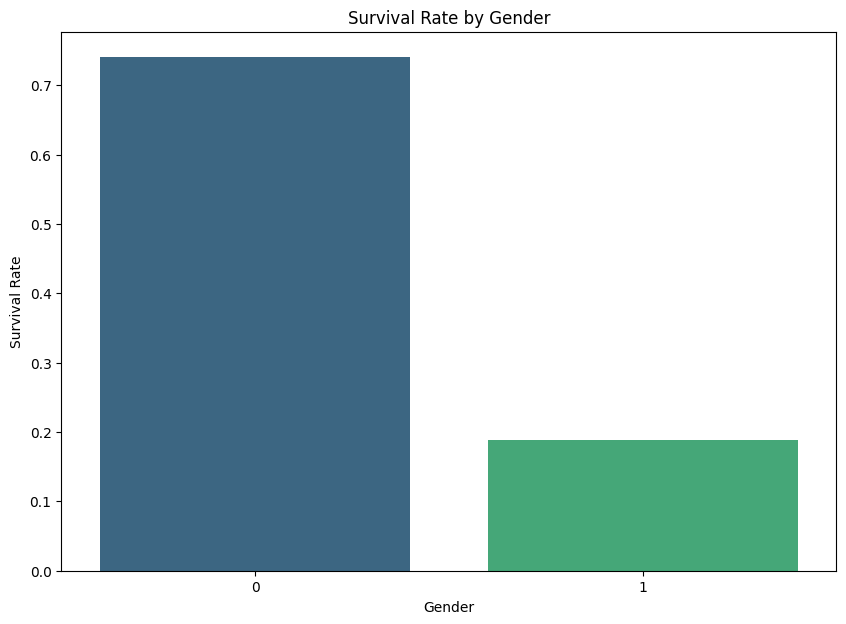

In [48]:
# Bar plot of Survival rate by Gender
plt.figure(figsize=(10, 7))
survival_rate = df.groupby('male')['Survived'].mean()
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()



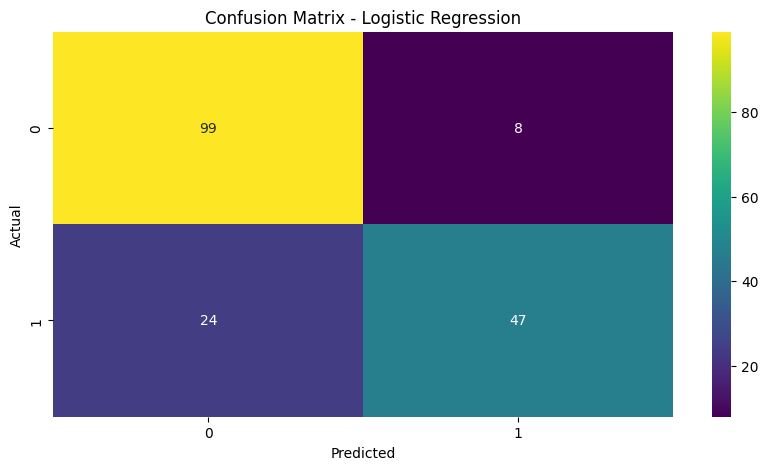

In [49]:
# Confusion matrix for Logistic Regression model
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
lr_pr_gb = gb.predict(X_test)


In [51]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Classification Model")
print("---" * 30)
acc = round(accuracy_score(y_test, lr_pr_gb) * 100, 2)
print(f"Accuracy: {acc}%")


Classification Model
------------------------------------------------------------------------------------------
Accuracy: 84.27%


In [52]:
# compared result side by side
result = np.column_stack([y_test, lr_pr_gb])
print("Actual Values  | Predicted Values ")
print("  ----------------------------")
for actual , predicted in result:
    print(f"{actual: 14.2f} | {predicted: 12.2f}")


Actual Values  | Predicted Values 
  ----------------------------
          0.00 |         0.00
          0.00 |         0.00
          1.00 |         1.00
          1.00 |         1.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         1.00
          0.00 |         0.00
          0.00 |         0.00
          1.00 |         1.00
          1.00 |         1.00
          1.00 |         1.00
          0.00 |         0.00
          1.00 |         1.00
          0.00 |         0.00
          0.00 |         0.00
          1.00 |         1.00
          1.00 |         1.00
          1.00 |         1.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         0.00
          1.00 |         0.00
          0.00 |         0.00
          0.00 |         1.00
          0.00 |         0.00
          0.00 |         0.00
          0.00 |         0.00
    

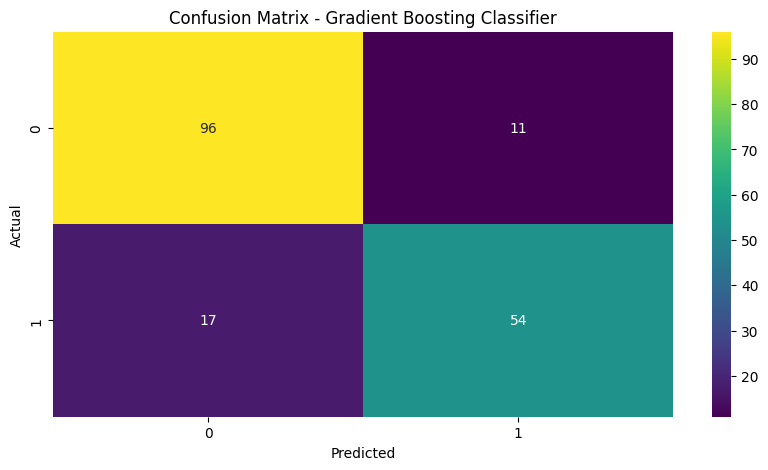

In [53]:
# Confusion matrix for Gradient Boosting Classifier
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, lr_pr_gb)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### The logistic regression and gradient boosting classifier models were successfully trained and evaluated, with visualizations providing insights into the survival patterns on the Titanic. The logistic regression model achieved an accuracy of 82.02%, while the gradient boosting classifier's performance was evaluated using a confusion matrix.